# 퍼셉트론과 딥러닝  
  
# 1. 퍼셉트론

퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘  
  
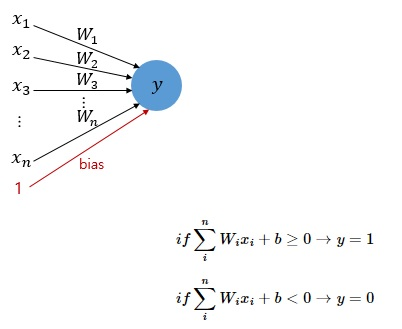  
  
x는 입력값, W는 가중치(Weight), y는 출력값을 의미한다. 그림 안의 원은 인공 뉴런이다.  
  
각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미  
  
각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력한다. 이러한 함수를 계단 함수(Step function)라고 한다.  
  
  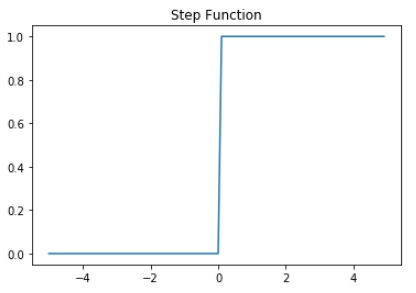  
  
이때 계단 함수에 사용된 이 임계치값을 수식으로 표현할 때는 보통 세타(Θ)로 표현한다. 이 식에서 임계치를 좌변으로 넘기고 편향 (bias)로 표현할 수도 있다.   
  
이렇게 하나의 층으로만 구성된 퍼셉트론을 단층 퍼셉트론이라고 한다. 퍼셉트론은 단층 퍼셉트론과 다층 퍼셉트론으로 나누어지는데, 단층 퍼셉트론은 값을 보내는 단계와 값을 받아서 출력하는 두 단계로만 이루어진다. 이때 이 각 단계를 보통 층(layer)라고 부르며, 이 두 개의 층을 입력층(input layer)과 출력층(output layer)이라고 한다.  
  
  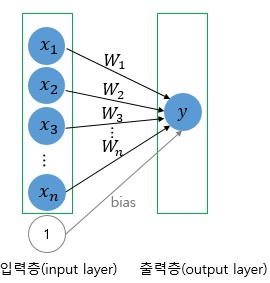  
  
* 단층 퍼셉트론으로 AND 연산 구현하기
   

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 기기선택/ cpu, gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 고정 랜덤값 설정
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

< 현재 사용되는 기기 확인 > 

In [13]:
device

'cpu'

< 입력값과 정답 레이블 텐서로 생성 > 

In [7]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [0], [0], [1]]).to(device)

< 선형회귀 모델과 시그모이드 함수 생성하여 연결 > 

In [8]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()  # 이진 분류에서 사용되는 출력 함수
model = nn.Sequential(linear, sigmoid).to(device)  # Sequential()은 여러 모델을 연결

< 비용 함수와 옵티마이저 정의 >

In [9]:
## nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

< 학습 >

In [11]:
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.0017131393542513251
1000 0.001556654809974134
2000 0.0014263164484873414
3000 0.0013160794042050838
4000 0.0012216655304655433
5000 0.0011398898204788566
6000 0.0010683604050427675
7000 0.0010052985744550824
8000 0.0009492399403825402
9000 0.0008991085342131555
10000 0.0008540231501683593


< 테스팅 >

In [12]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.4220231e-09]
 [1.0040824e-03]
 [1.0040824e-03]
 [9.9859434e-01]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [1.]]
실제값(Y):  [[0.]
 [0.]
 [0.]
 [1.]]
정확도(Accuracy):  1.0


* 단층 퍼셉트론으로 XOR 연산 구현하기

In [13]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [14]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [15]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [17]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.6931471824645996
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


In [18]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


위 두 예제에서 and 연산은 단층 퍼셉트론을 구현할 수는 있지만 xor는 구현이 불가능 한것을 볼 수 있다. 이러한 문제는 다층 퍼셉트론으로 구현할 수 있다. 
  
  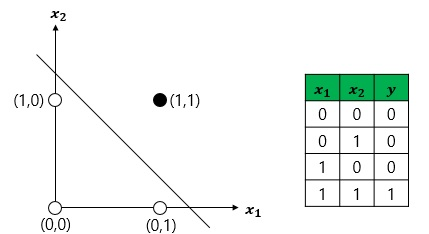  
  <AND 연산>  
  
  
  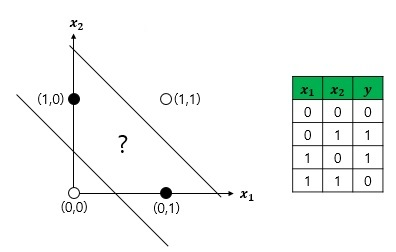    
  <XOR 연산>  
  
XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있다. 즉 AND, OR 등의 층을 쌓아서 구현하면 가능하다는 말이다. 이처럼 여러 층을 쌓아서 만든 퍼셉트론을 다층 퍼셉트론이라 한다. 다층 퍼셉트론은 중간에 층을 더 추가하는데, 이렇게 입력층과 출력층 사이에 존재하는 층을 은닉층(hidden layer)이라고 한다.  
  
  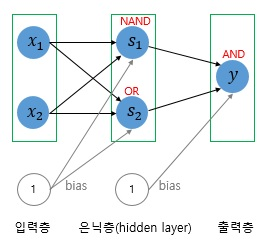  
  
다층 퍼셉트론은 본래 은닉층이 1개 이상인 퍼셉트론을 말한다. 즉, XOR 문제보다 더욱 복잡한 문제를 해결하기 위해서 다층 퍼셉트론은 중간에 수많은 은닉층을 더 추가할 수 있다.
  
  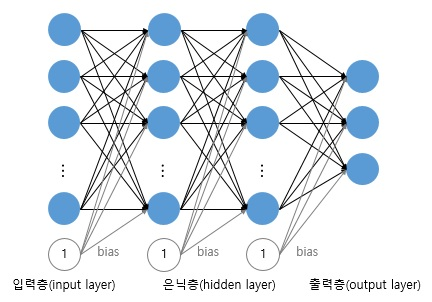  
  
이처럼 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 한다.  

# 2. 역전파  
  
인공 신경망 학습의 목적도 앞서 학습했던 선형회귀, 로지스틱회귀, 소프트맥스 회귀와 마찬가지로 최적의 가중치 W와 편향 b를 찾는 것이다. 이를 위해서는 순전파로 가중치와 입력값들의 곱으로 순방향 계산을 하고 역전파를 통해 역방향으로 오차 최소 지점을 찾아 가중치와 편향을 조절해 나간다. 

1) 순전파  
  
  은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용  
  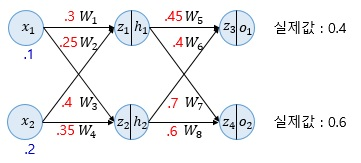  
  
  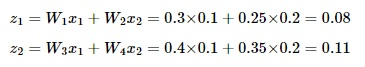  
  
  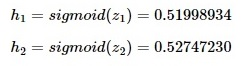  
  
  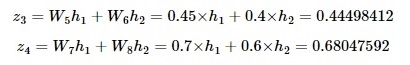  
  
  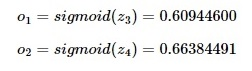  
  
  평균 제곱 오차 MSE를 사용하여 오차 계산  
  
  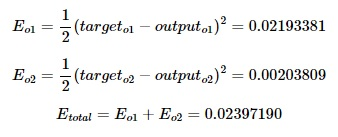  
  
2) 역전파  
  
  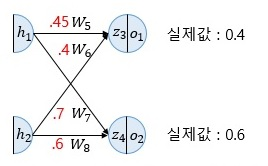  
  
역전파 1단계에서 업데이트 해야 할 가중치는 W5, W6, W7, W8 총 4개이므로 순서대로 하나씩 경사하강을 통해 비용의 최소 지점을 찾아 가중치값을 변경한다.  

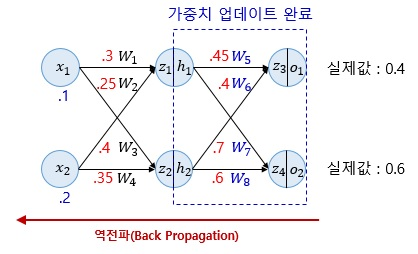  
  
이렇게 역방향으로 진행하면서 가중치를 변경해 간다. 
  
  

* 다층 퍼셉트론으로 XOR 연산 구현하기

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [15]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [16]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

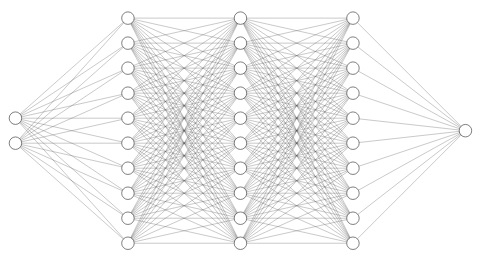

< 비용함수 / 옵티마이저 생성 >

In [17]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

< 학습 >

In [18]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 1000 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
1000 0.6931380033493042
2000 0.6931171417236328
3000 0.6930763721466064
4000 0.6929103136062622
5000 0.6820818185806274
6000 0.0013033139985054731
7000 0.00048400633386336267
8000 0.0002891554613597691
9000 0.00020391402358654886
10000 0.0001565940328873694


< 테스팅 >

In [19]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.11739784e-04]
 [9.99828696e-01]
 [9.99842167e-01]
 [1.85383164e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


# 3. 활성화 함수  
  
인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 한다. 활성화함수는 다음 층으로 계산 결과를 전달할 때 값을 활성화하는 역할을 한다. 그런데 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없다. 선형은 f(f(f(x)))와 같이 쌓아도 WxWxWx(x)와 마찬가지이므로 W 세제곱을 한번에 곱한것과 같다. 그래서 은닉층에 사용할 활성화함수는 비선형이어야 한다. 앞서 배웠던 시그모이드, 소프트맥스 함수가 활성화 함수에 속한다.  
  
  1. 시그모이드 함수의 기울기 소실  
  
  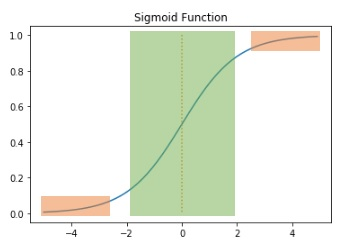  
  
주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 된다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 된다. 이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 한다.  
  
  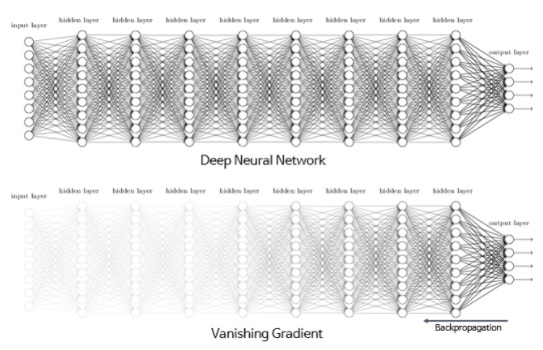  
  
시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 된다.
  
  2. 렐루 함수(ReLU)  
가장 많이 사용되는 활성화함수로 단순 임계값이므로 연산 속도도 빠르다.  
  
  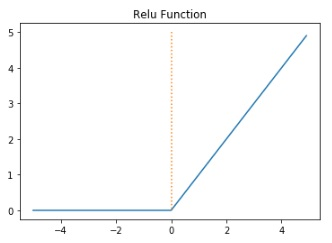
  
렐루의 문제점은 입력값이 음수면 기울기도 0이 되는 점이다. 이를 죽은 렐루(dying ReLU)라고 한다.  
  
  3. 리키 렐루(Leaky ReLU)  
죽은 렐루를 보완하기 위해 만든 ReLU의 변형 함수. 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환  
  
  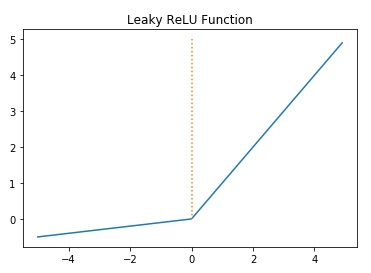  
  
  4. 정리  
활성화 함수는 은닉층은 렐루나 렐루의 변형을 사용하고 출력층에서 이진 분류는 시그모이드를, 다중 분류는 소프트맥스를 사용한다.  
  
* MNIST 손글씨 분류 예제  
  

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

< 손글씨 데이터를 사이킷런 사이트에서 받음 >

In [21]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [39]:
x_data = np.array(mnist.data)
x_data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [40]:
mnist.target[0]

5

In [41]:
mnist.target = mnist.target.astype(np.int8) #astype(): 배열 요소 타입 변환

In [50]:
X = x_data / 255  # 0-255값을 [0,1] 구간으로 정규화

y = np.array(mnist.target)

In [45]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
y[0]

5

이 이미지 데이터의 레이블은 5이다


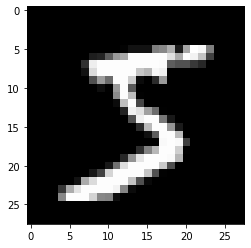

In [47]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [48]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

< 학습 데이터 미니 배치로 생성 > 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)  # 미니 배치 
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)   # 미니 배치 

< 모델 생성 >

In [53]:
from torch import nn

model = nn.Sequential()
# 입력 영상의 크기가 28*28, 흑백:1채널 
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


< 비용함수, 옵티마이저 생성 >  
비용함수: 현재 가중치와 편향에서의 정답과의 거리(오차크기) 계산  
옵티마이저: 비용이 최소화되는 지점의 가중치와 편향을 알아내서 이 값으로 가중치와 편향을 변경

In [55]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss() # CrossEntropyLoss(): 이 비용함수는 자체적으로 softmax() 함수를 가지고 있다. 

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

< 학습 함수 정의 >

In [56]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

< 테스트 함수 정의 >

In [58]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [59]:
test()


테스트 데이터에서 예측 정확도: 1769/21000 (8%)



In [60]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 20167/21000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


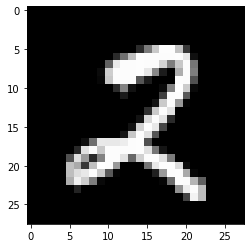

In [61]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

# 4. 과적합 방지  
  
1) 데이터의 양을 늘리기  
2) 모델의 복잡도 줄이기(은닉층의 수, 은닉층 노드 수 조절)  
3) 가중치 규제(Regularization) 적용하기  
L1 규제  
L2 규제  
4) 드롭아웃(Dropout)  
학습 과정에서 신경망의 일부를 사용하지 않는 방법  
드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용  

  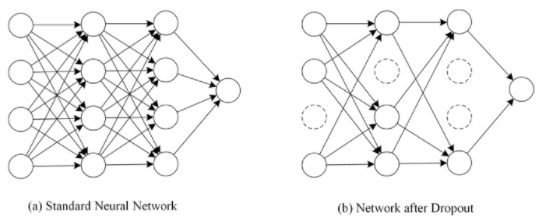  
  
  
  
  
  